<a href="https://colab.research.google.com/github/markiroberts/gogglecolab01/blob/main/02Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import PyTorch and matplotlib
import torch
from torch import nn
import matplotlib as plt

# Check PyTorch Version
torch.__version__

'2.1.0+cu121'

In [2]:
def plot_predictions(xtrain, ytrain, xtest, ytest, predictions=None):

  plt.pyplot.figure(figsize=(10,7))
  plt.pyplot.scatter(xtrain, ytrain,  c="b", s=4,   marker=".", label="Training data")
  plt.pyplot.scatter(xtest,  ytest,   c="g", s=4,  marker=".", label="Testing data")
  if predictions is not None:
    titletext = f"Element counts Training: {len(xtrain)}, Test: {len(xtest)}, Predictions:{len(predictions)}"
    plt.pyplot.scatter(xtest, predictions,   c="r", s=4,  marker=".", label="Predictions")
  else:
    titletext = f"Element counts Training: {len(xtrain)}, Test: {len(xtest)}, Predictions: None"

  plt.pyplot.legend(prop={"size": 14})
  plt.pyplot.title(titletext)

In [3]:
def plot_loss(epochlist, train_losslist, test_losslist):

  plt.pyplot.figure(figsize=(10,7))
  plt.pyplot.scatter(epochlist, train_losslist,  c="b", s=4,   marker=".", label="Training")
  plt.pyplot.scatter(epochlist, test_losslist,   c="r", s=4,   marker=".", label="Test")
  titletext = f"Loss vs. Epoch"

  plt.pyplot.legend(prop={"size": 14})
  plt.pyplot.title(titletext)

In [4]:
def show_model(themodel):
  for x in themodel.state_dict().items():
    for y in x:
      print (y, sep=" ", end="")
      print("\t", end="")
    print (" ")


##Create device-agnostic code

This means if we've got access to a GPU, our code will use

In [5]:
# Setup device agnostic code.
device = "cuda" if torch.cuda.is_available() else "cpu"
print (f"Device: {device}")

Device: cuda


(1797, 64)
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


<Figure size 640x480 with 0 Axes>

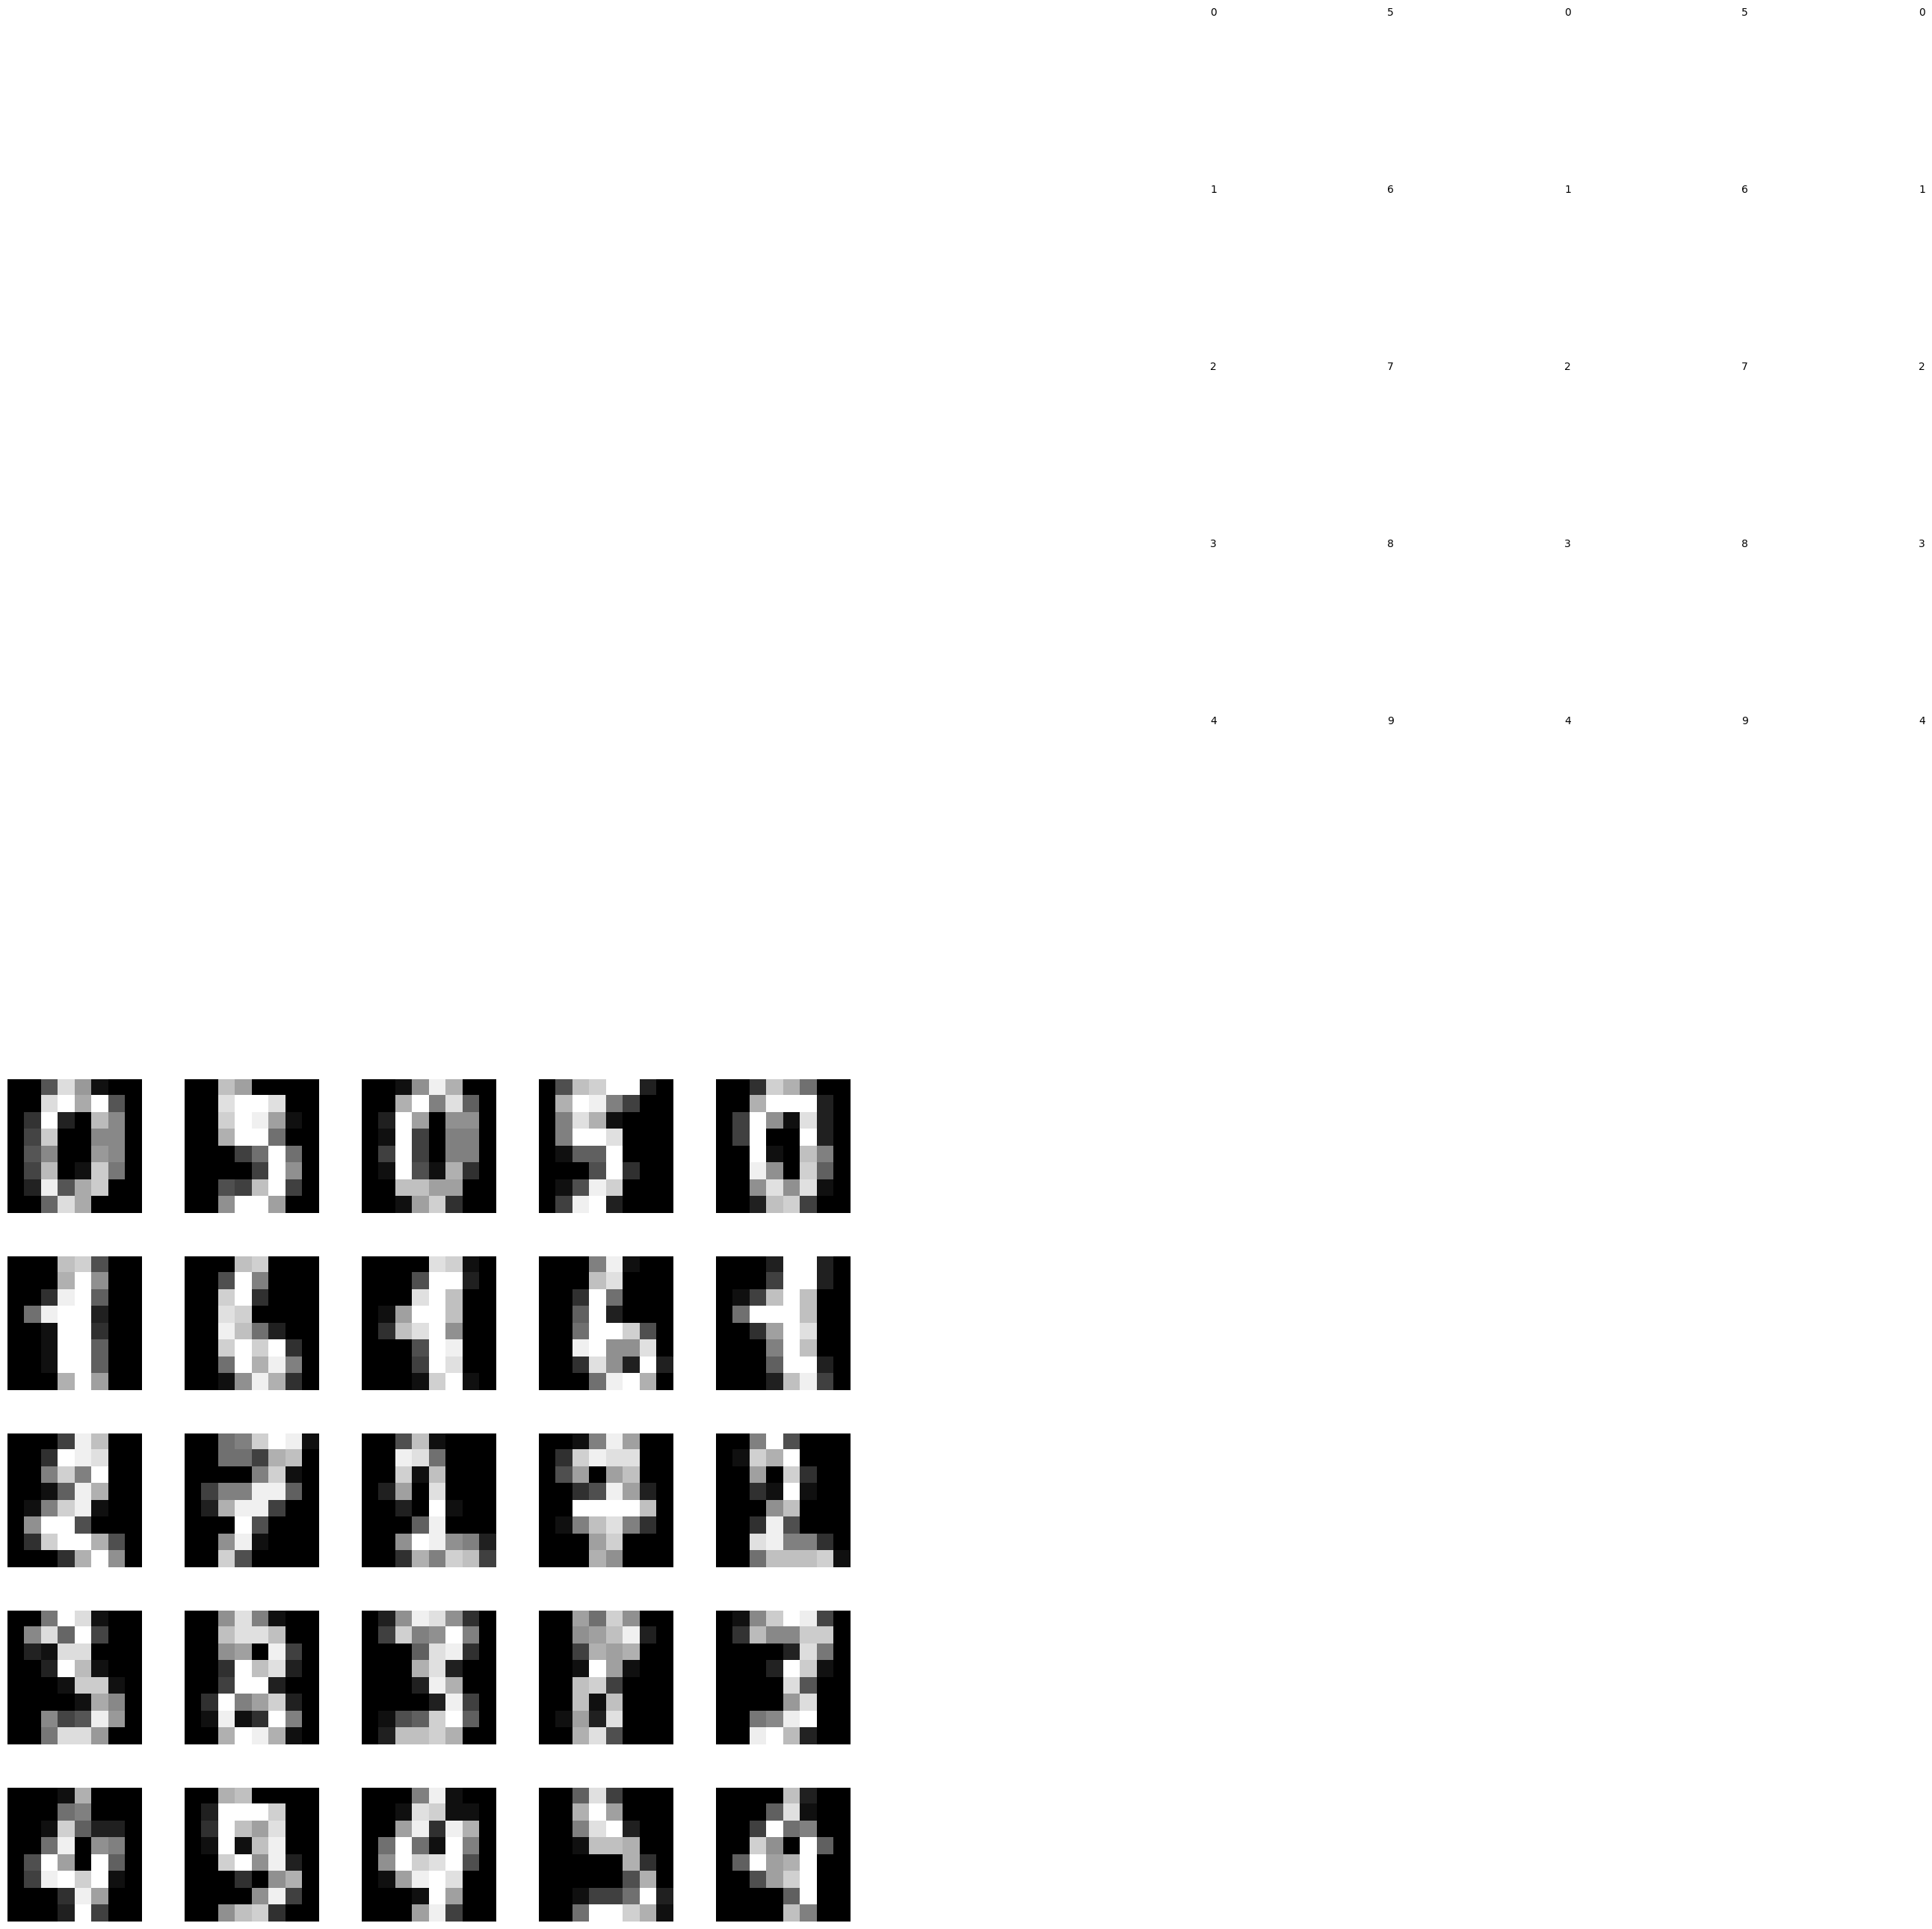

<function Bunch.items>

In [109]:
from sklearn.datasets import load_digits

digits = load_digits()
print(digits.data.shape)
print(digits.data[0])
import matplotlib.pyplot as plt
plt.close('all')
plt.gray()
plt.tight_layout(pad=None, h_pad=None, w_pad=None, rect=None)
fig, axs = plt.subplots(5,5,figsize=(12,12))
fig.tight_layout()
graph = 0
left, width = .25, .5
bottom, height = .25, .5
right = left + width
top = bottom + height

left = left * 12
right = right * 12
top = top * 12
bottom = bottom * 12

for digit in range(25):
  x = graph % 5
  y = int(graph / 5)
  axs[x,y].matshow(digits.images[graph])
#  axs[x,y].set_title(digits.target[graph])
  axs[x,y].text(right, top, digits.target[graph],
        horizontalalignment='center',
        verticalalignment='top',
        transform=axs[x,y].transAxes)

  axs[x,y].set_xlabel(None)
  axs[x,y].set_ylabel(None)
#  axs[x,y].Setup()
  axs[x,y].set_axis_off()
  graph = graph + 1
plt.show()
digits.items


In [15]:
digits['DESCR']

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 1797\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixel

In [41]:
for x in digits:
  print(x, "\t", end="")
  match x:
    case 'data':
      print (digits.data[:5])
    case 'target':
      print (digits.target[:5])
    case 'frame':
      print (digits.frame)
    case 'feature_names':
      print (digits.feature_names[:5])
    case 'target_names':
      print (digits.target_names[:5])
    case 'images':
      for image in digits.images[:5]:
        print('image: ', image)
    case 'DESCR':
      print (digits.DESCR )
    case _:
      print('other', x)


data 	[[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
  15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
   0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
   0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
 [ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
   3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
  16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
   0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]
 [ 0.  0.  0.  4. 15. 12.  0.  0.  0.  0.  3. 16. 15. 14.  0.  0.  0.  0.
   8. 13.  8. 16.  0.  0.  0.  0.  1.  6. 15. 11.  0.  0.  0.  1.  8. 13.
  15.  1.  0.  0.  0.  9. 16. 16.  5.  0.  0.  0.  0.  3. 13. 16. 16. 11.
   5.  0.  0.  0.  0.  3. 11. 16.  9.  0.]
 [ 0.  0.  7. 15. 13.  1.  0.  0.  0.  8. 13.  6. 15.  4.  0.  0.  0.  2.
   1. 13. 13.  0.  0.  0.  0.  0.  2. 15. 11.  1.  0.  0.  0.  0.  0.  1.
  12. 12.  1.  0.  0.  0.  0.  0.  1. 10.  8.  0.  